In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.nn import NeuralNetwork
from src.nn import TorchNN
from src.nn import plot_loss_and_accuracy
from src.nn import train
from src.nn import evaluate
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import pandas as pd


In [2]:
X_images = np.load ("X_images.npy")
y_images = np.load ("y_images.npy")
#normalizo 
X_images = X_images / 255.0

In [3]:
# 1
print("Shape de X_images:", X_images.shape)
print("Shape de y_images:", y_images.shape)

# revisar nans, dataset bastante limpio
print("Cantidad de nan en X_images:", np.isnan(X_images).sum())
print("Cantidad de nan en y_images:", np.isnan(y_images).sum())

num_clases = np.unique(y_images).shape[0]
print("Cantidad de clases distintas en y_images:", num_clases)

Shape de X_images: (5000, 784)
Shape de y_images: (5000,)
Cantidad de nan en X_images: 0
Cantidad de nan en y_images: 0
Cantidad de clases distintas en y_images: 49


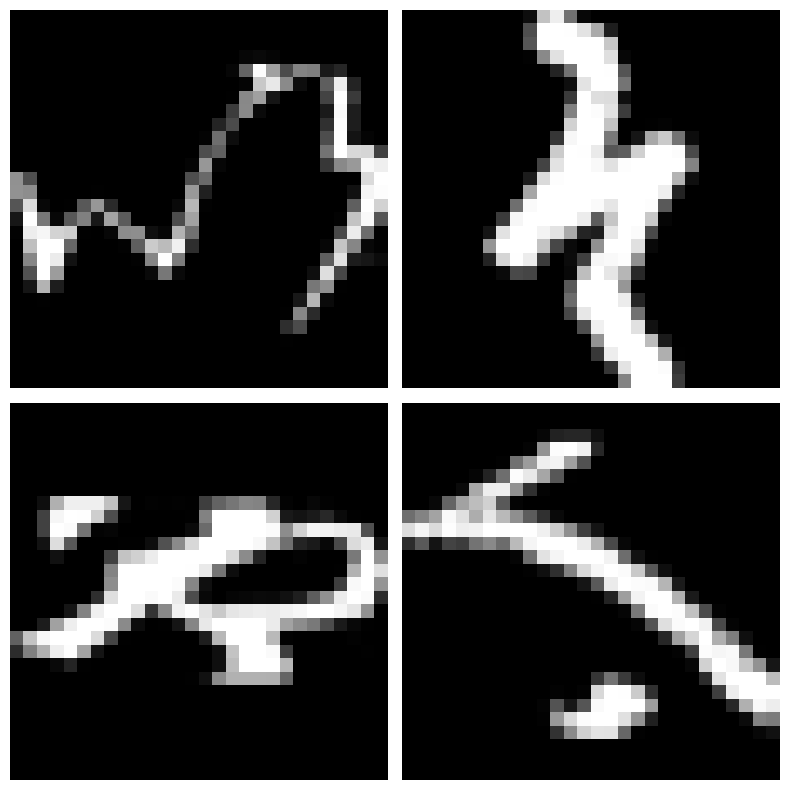

In [4]:
img_1 = X_images[100].reshape(28 ,28)
img_2 = X_images[1000].reshape(28 ,28)
img_3 = X_images[2500].reshape(28 ,28)
img_4 = X_images[4999].reshape(28,28)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))


images = [img_1, img_2, img_3, img_4]
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off') 

plt.tight_layout()
plt.show()

In [5]:
num_samples = X_images.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

X_images = X_images[indices]
y_images = y_images[indices]

# test 20% train 80%
split_index = int(num_samples * 0.8)


X_train_val = X_images[:split_index]
y_train_val = y_images[:split_index]
X_test = X_images[split_index:]
y_test = y_images[split_index:]

num_samples = X_train_val.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

X_train_val = X_train_val[indices]
y_train_val = y_train_val[indices]

# val 20% train 80%
split_index = int(num_samples * 0.8)


X_train = X_train_val[:split_index]
y_train = y_train_val[:split_index]
X_val = X_train_val[split_index:]
y_val = y_train_val[split_index:]



In [6]:
print("train")
print("Shape de X_images:", X_train.shape)
print("Shape de y_images:", y_train.shape)
print("val")
print("Shape de X_images:", X_val.shape)
print("Shape de y_images:", y_val.shape)
print("test")
print("Shape de X_images:", X_test.shape)
print("Shape de y_images:", y_test.shape)

train
Shape de X_images: (3200, 784)
Shape de y_images: (3200,)
val
Shape de X_images: (800, 784)
Shape de y_images: (800,)
test
Shape de X_images: (1000, 784)
Shape de y_images: (1000,)


In [7]:
#2
#m0 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.1, rs="", batch_size=0, adam=0, lambda_reg= 0, patience=300)
m0 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.1, rs="", batch_size=0, adam=0, lambda_reg= 0, patience=300)

# Entrenar
train_acc, val_acc = m0.fit(X_train, y_train, X_val, y_val, epochs=300)



Epoch 0, Loss: 4.0721, Accuracy: 0.0153
Epoch 100, Loss: 2.1262, Accuracy: 0.5094
Epoch 200, Loss: 1.3457, Accuracy: 0.6819
Epoch 299, Loss: 1.0045, Accuracy: 0.7647


Accuracy: 0.7356
Cross-Entropy Loss: 1.0873
Matriz de Confusión:


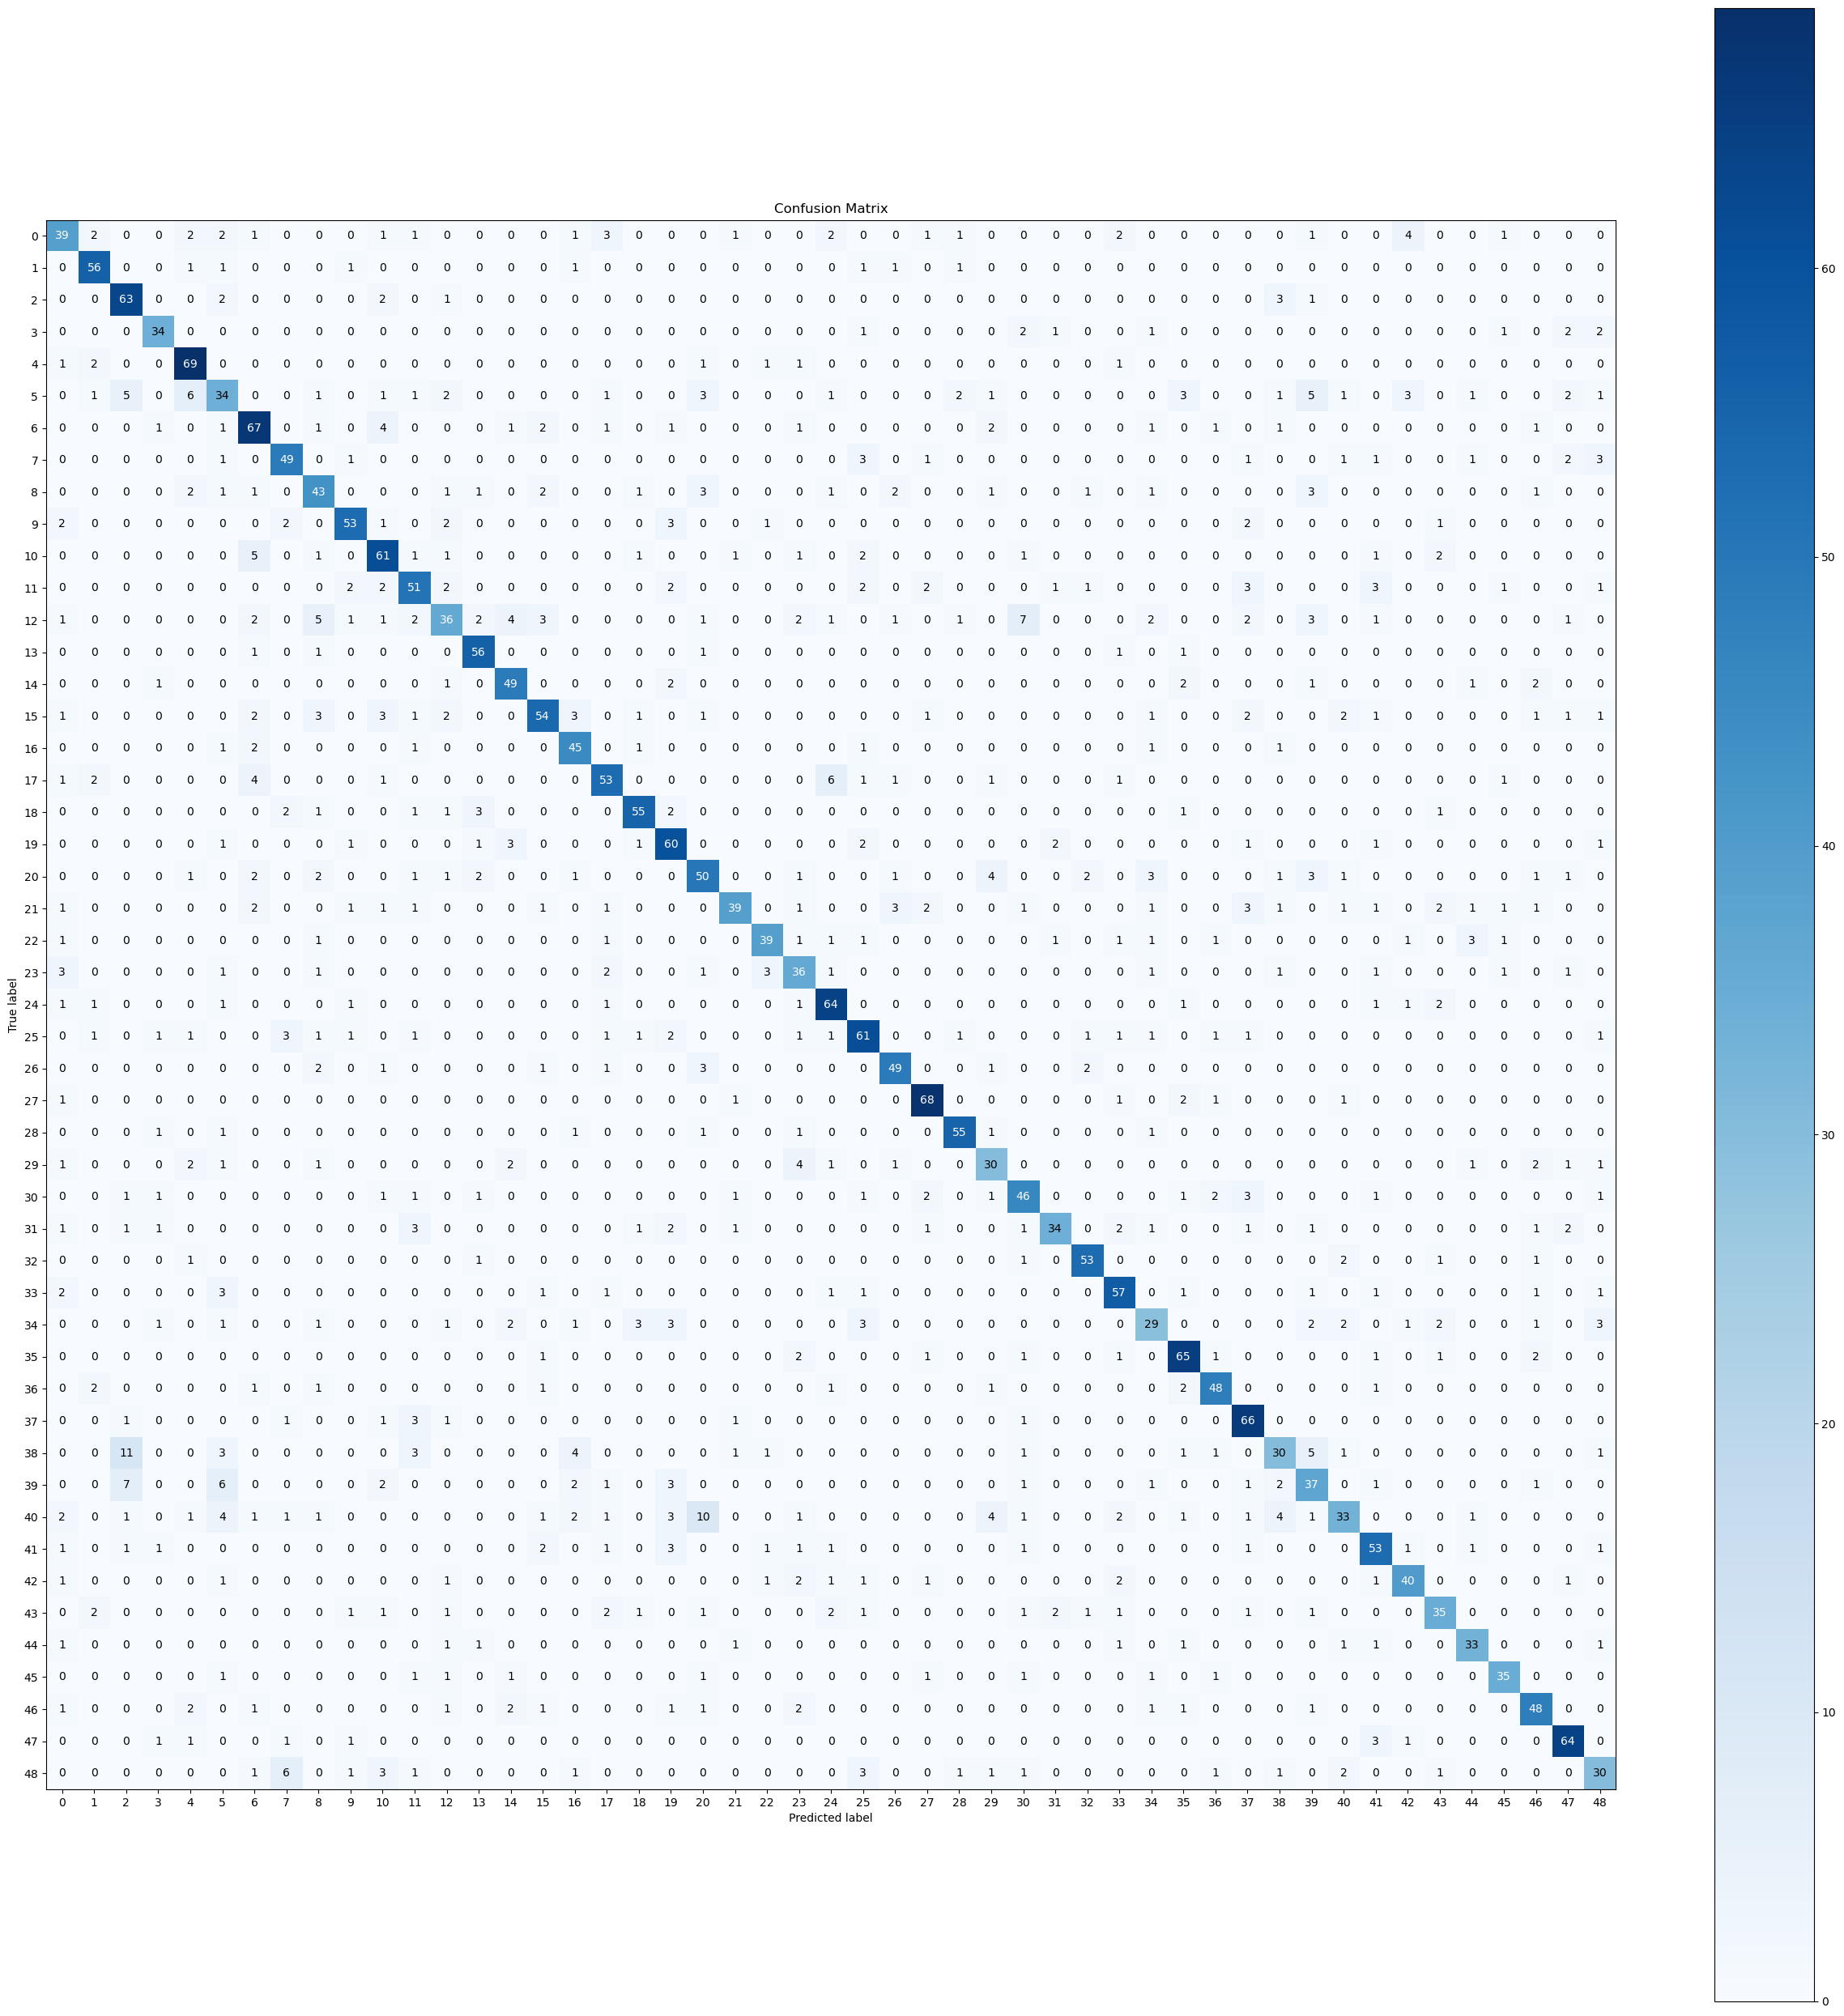

Accuracy: 0.5587
Cross-Entropy Loss: 1.7778
Matriz de Confusión:


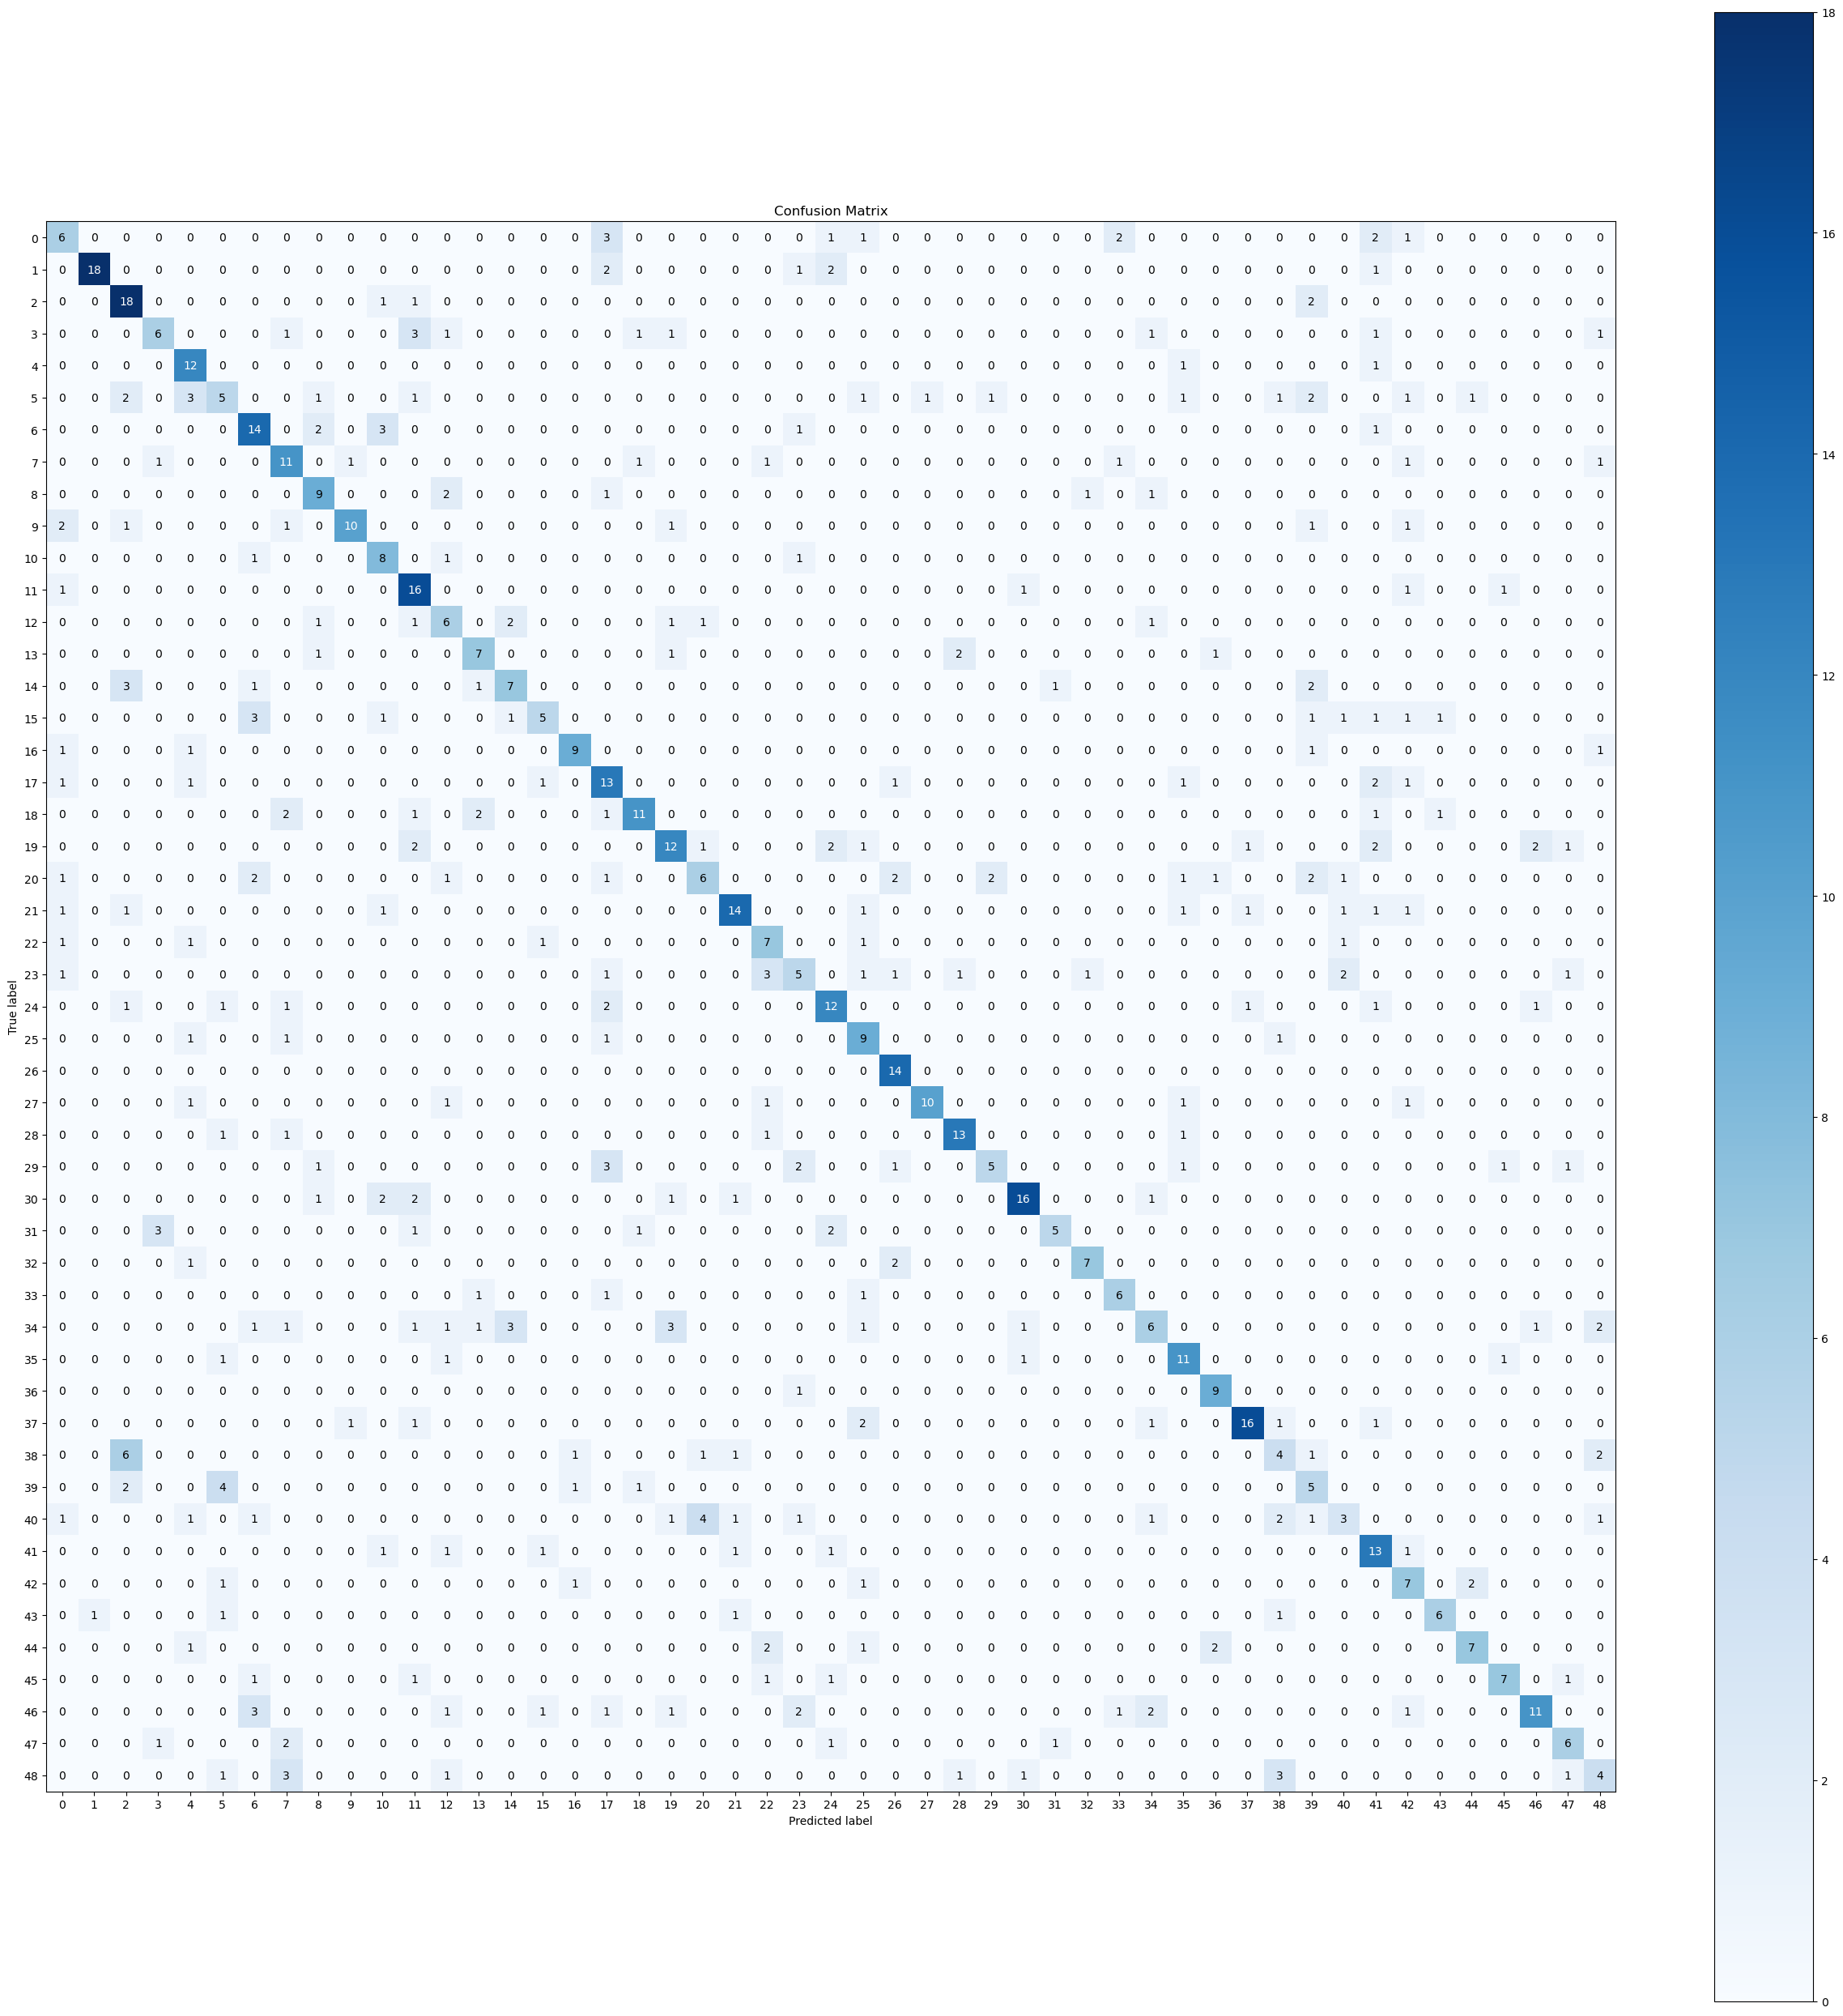

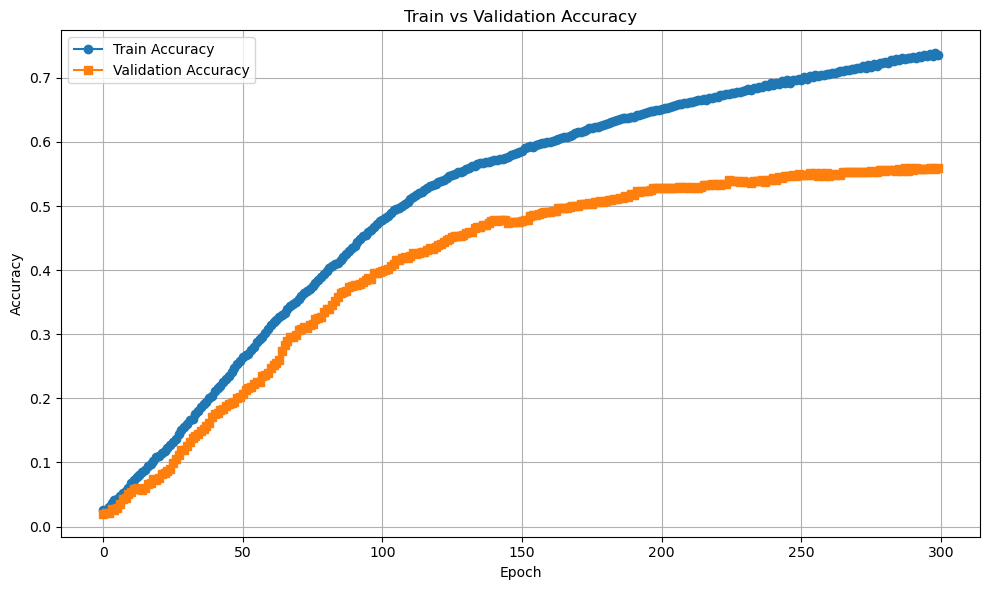

In [8]:
#reporte con train
m0.evaluate(X_train,y_train)
#reporte con val
m0.evaluate(X_val, y_val)
plot_loss_and_accuracy(train_acc, val_acc)

In [ ]:
#3
# entreno las redes con sus mejoras para hacer el reporte
#Rate scheduling lineal (con saturación) y exponencial.
nn1 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.1, rs="linear", batch_size=0, adam=0, lambda_reg= 0, patience=1000)
nn1.fit(X_train, y_train, X_val, y_val, epochs=300)

nn2 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.1, rs="exponential", batch_size=0, adam=0, lambda_reg= 0, patience=1000)
nn2.fit(X_train, y_train, X_val, y_val, epochs=300)

#mini batch y sgd
nn3 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.01, rs="", batch_size=1000, adam=0, lambda_reg= 0, patience=1000)
nn3.fit(X_train, y_train, X_val, y_val, epochs=300)

nn4 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.01, rs="", batch_size=1, adam=0, lambda_reg= 0, patience=1000)
nn4.fit(X_train, y_train, X_val, y_val, epochs=10)
# adam
nn5 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.01, rs="", batch_size=0, adam=1, lambda_reg= 0, patience=1000)
nn5.fit(X_train, y_train, X_val, y_val, epochs=300)
#L2
nn6 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.1, rs="", batch_size=0, adam=0, lambda_reg= 0.01, patience=1000)
nn6.fit(X_train, y_train, X_val, y_val, epochs=300)
#early stop
nn7 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.1, rs="", batch_size=0, adam=0, lambda_reg= 0, patience=10)
nn7.fit(X_train, y_train, X_val, y_val, epochs=500)


Epoch 0, Loss: 4.0642, Accuracy: 0.0312
Epoch 100, Loss: 2.1832, Accuracy: 0.5028
Epoch 200, Loss: 1.6574, Accuracy: 0.6100
Epoch 299, Loss: 1.5345, Accuracy: 0.6275
Epoch 0, Loss: 4.0390, Accuracy: 0.0194
Epoch 100, Loss: 2.6824, Accuracy: 0.3797
Epoch 200, Loss: 2.1957, Accuracy: 0.5031
Epoch 299, Loss: 2.0331, Accuracy: 0.5406
Epoch 0, Loss: 4.0067, Accuracy: 0.0156
Epoch 100, Loss: 3.2349, Accuracy: 0.2484
Epoch 200, Loss: 2.4597, Accuracy: 0.4459
Epoch 299, Loss: 1.8639, Accuracy: 0.5625
Epoch 0, Loss: 0.4319, Accuracy: 0.5072
Epoch 9, Loss: 0.0007, Accuracy: 0.9762
Epoch 0, Loss: 4.0064, Accuracy: 0.0259
Epoch 100, Loss: 0.0013, Accuracy: 1.0000
Epoch 200, Loss: 0.0005, Accuracy: 1.0000
Epoch 299, Loss: 0.0003, Accuracy: 1.0000
Epoch 0, Loss: 3.9981, Accuracy: 0.0241
Epoch 100, Loss: 2.2768, Accuracy: 0.4872
Epoch 200, Loss: 1.5861, Accuracy: 0.6288
Epoch 299, Loss: 1.3317, Accuracy: 0.6806
Epoch 0, Loss: 4.0263, Accuracy: 0.0206
Epoch 100, Loss: 2.1092, Accuracy: 0.5088
Epoch 20

In [9]:
print("Rate scheduling lineal (con saturación)")
nn1.evaluate(X_val, y_val, cm_show=0)

print("Rate scheduling exponencial.")
nn2.evaluate(X_val, y_val, cm_show=0)

print("mini-batch")
nn3.evaluate(X_val, y_val, cm_show=0)

print("SGD")
nn4.evaluate(X_val, y_val, cm_show=0)

print("adam")
nn5.evaluate(X_val, y_val, cm_show=0)

print("L2")
nn6.evaluate(X_val, y_val, cm_show=0)

print("Early stop")
nn7.evaluate(X_val, y_val, cm_show=0)

Rate scheduling lineal (con saturación)
Accuracy: 0.5075
Cross-Entropy Loss: 1.9944
Rate scheduling exponencial.
Accuracy: 0.4338
Cross-Entropy Loss: 2.3198
mini-batch
Accuracy: 0.4612
Cross-Entropy Loss: 2.1909
SGD
Accuracy: 0.6238
Cross-Entropy Loss: 2.0922
adam
Accuracy: 0.6138
Cross-Entropy Loss: 4.1095
L2
Accuracy: 0.5650
Cross-Entropy Loss: 1.7913
Early stop
Accuracy: 0.5813
Cross-Entropy Loss: 1.6294


In [13]:
mejor_acc = 0
for adam in [0,1]:
    nn = NeuralNetwork(784, [100, 80], 49, learning_rate=0.01, rs="", batch_size=1250, adam=adam, lambda_reg=0.01, patience=500)
    nn.fit(X_train, y_train, X_val, y_val, epochs=500)
    acc = nn.accuracy(X_val, y_val)
    if acc > mejor_acc:
        mejor_acc = acc
        mejor_adam = adam
mejor_acc = 0
for lr in [0.1, 0.01]:
    nn = NeuralNetwork(784, [100, 80], 49, learning_rate=lr, rs="linear", batch_size=0, adam=mejor_adam, lambda_reg=0, patience=1000)
    nn.fit(X_train, y_train, X_val, y_val, epochs=300)
    acc = nn.accuracy(X_val, y_val)
    if acc > mejor_acc:
        mejor_acc = acc
        mejor_lr = lr
        
mejor_acc = 0
for bs in [1250, 2500, 1000, 0]:
    nn = NeuralNetwork(784, [100, 80], 49, learning_rate=mejor_lr, rs="", batch_size=bs, adam=mejor_adam, lambda_reg=0, patience=1000)
    nn.fit(X_train, y_train, X_val, y_val, epochs=300)
    acc = nn.accuracy(X_val, y_val)
    if acc > mejor_acc:
        mejor_acc = acc
        mejor_bs = bs
mejor_acc = 0
for lmbda in [0.001, 0.01, 0.1, 0]:
    nn = NeuralNetwork(784, [100, 80], 49, learning_rate=mejor_lr, rs="", batch_size=mejor_bs, adam=mejor_adam, lambda_reg=lmbda, patience=1000)
    nn.fit(X_train, y_train, X_val, y_val, epochs=300)
    acc = nn.accuracy(X_val, y_val)
    if acc > mejor_acc:
        mejor_acc = acc
        mejor_l2 = lmbda
mejor_acc = 0
for p in [5, 10, 20, 50, 500]:
    nn = NeuralNetwork(784, [100, 80], 49, learning_rate=mejor_lr, rs="", batch_size=mejor_bs, adam=0, lambda_reg=mejor_l2, patience=p)
    nn.fit(X_train, y_train, X_val, y_val, epochs=500)
    acc = nn.accuracy(X_val, y_val)
    if acc > mejor_acc:
        mejor_acc = acc
        mejor_p = p


Epoch 0, Loss: 4.0018, Accuracy: 0.0262
Epoch 100, Loss: 3.5206, Accuracy: 0.1475
Epoch 200, Loss: 2.8966, Accuracy: 0.3438
Epoch 300, Loss: 2.3517, Accuracy: 0.4794
Epoch 400, Loss: 2.1244, Accuracy: 0.5509
Epoch 499, Loss: 1.7350, Accuracy: 0.5962
Epoch 0, Loss: 3.6668, Accuracy: 0.1753
Epoch 100, Loss: 0.0164, Accuracy: 1.0000
Epoch 200, Loss: 0.0162, Accuracy: 1.0000
Epoch 300, Loss: 0.0161, Accuracy: 1.0000
Epoch 400, Loss: 0.0159, Accuracy: 1.0000
Epoch 499, Loss: 0.0158, Accuracy: 1.0000
Epoch 0, Loss: 4.0184, Accuracy: 0.0434
Epoch 100, Loss: 2.2134, Accuracy: 0.3584
Epoch 200, Loss: 1.9545, Accuracy: 0.4197
Epoch 299, Loss: 1.8443, Accuracy: 0.4581
Epoch 0, Loss: 4.0518, Accuracy: 0.0547
Epoch 100, Loss: 0.0016, Accuracy: 1.0000
Epoch 200, Loss: 0.0006, Accuracy: 1.0000
Epoch 299, Loss: 0.0003, Accuracy: 1.0000
Epoch 0, Loss: 3.7106, Accuracy: 0.1437
Epoch 100, Loss: 0.0006, Accuracy: 1.0000
Epoch 200, Loss: 0.0002, Accuracy: 1.0000
Epoch 299, Loss: 0.0001, Accuracy: 1.0000
Ep

In [14]:
print(mejor_adam, mejor_bs, mejor_l2, mejor_lr, mejor_p)

1 1250 0.01 0.01 10


Epoch 0, Loss: 3.6995, Accuracy: 0.1766
Early stopping 17
Epoch 17, Loss: 0.1452, Accuracy: 0.9828
Accuracy: 0.6088
Cross-Entropy Loss: 2.1874
Matriz de Confusión:


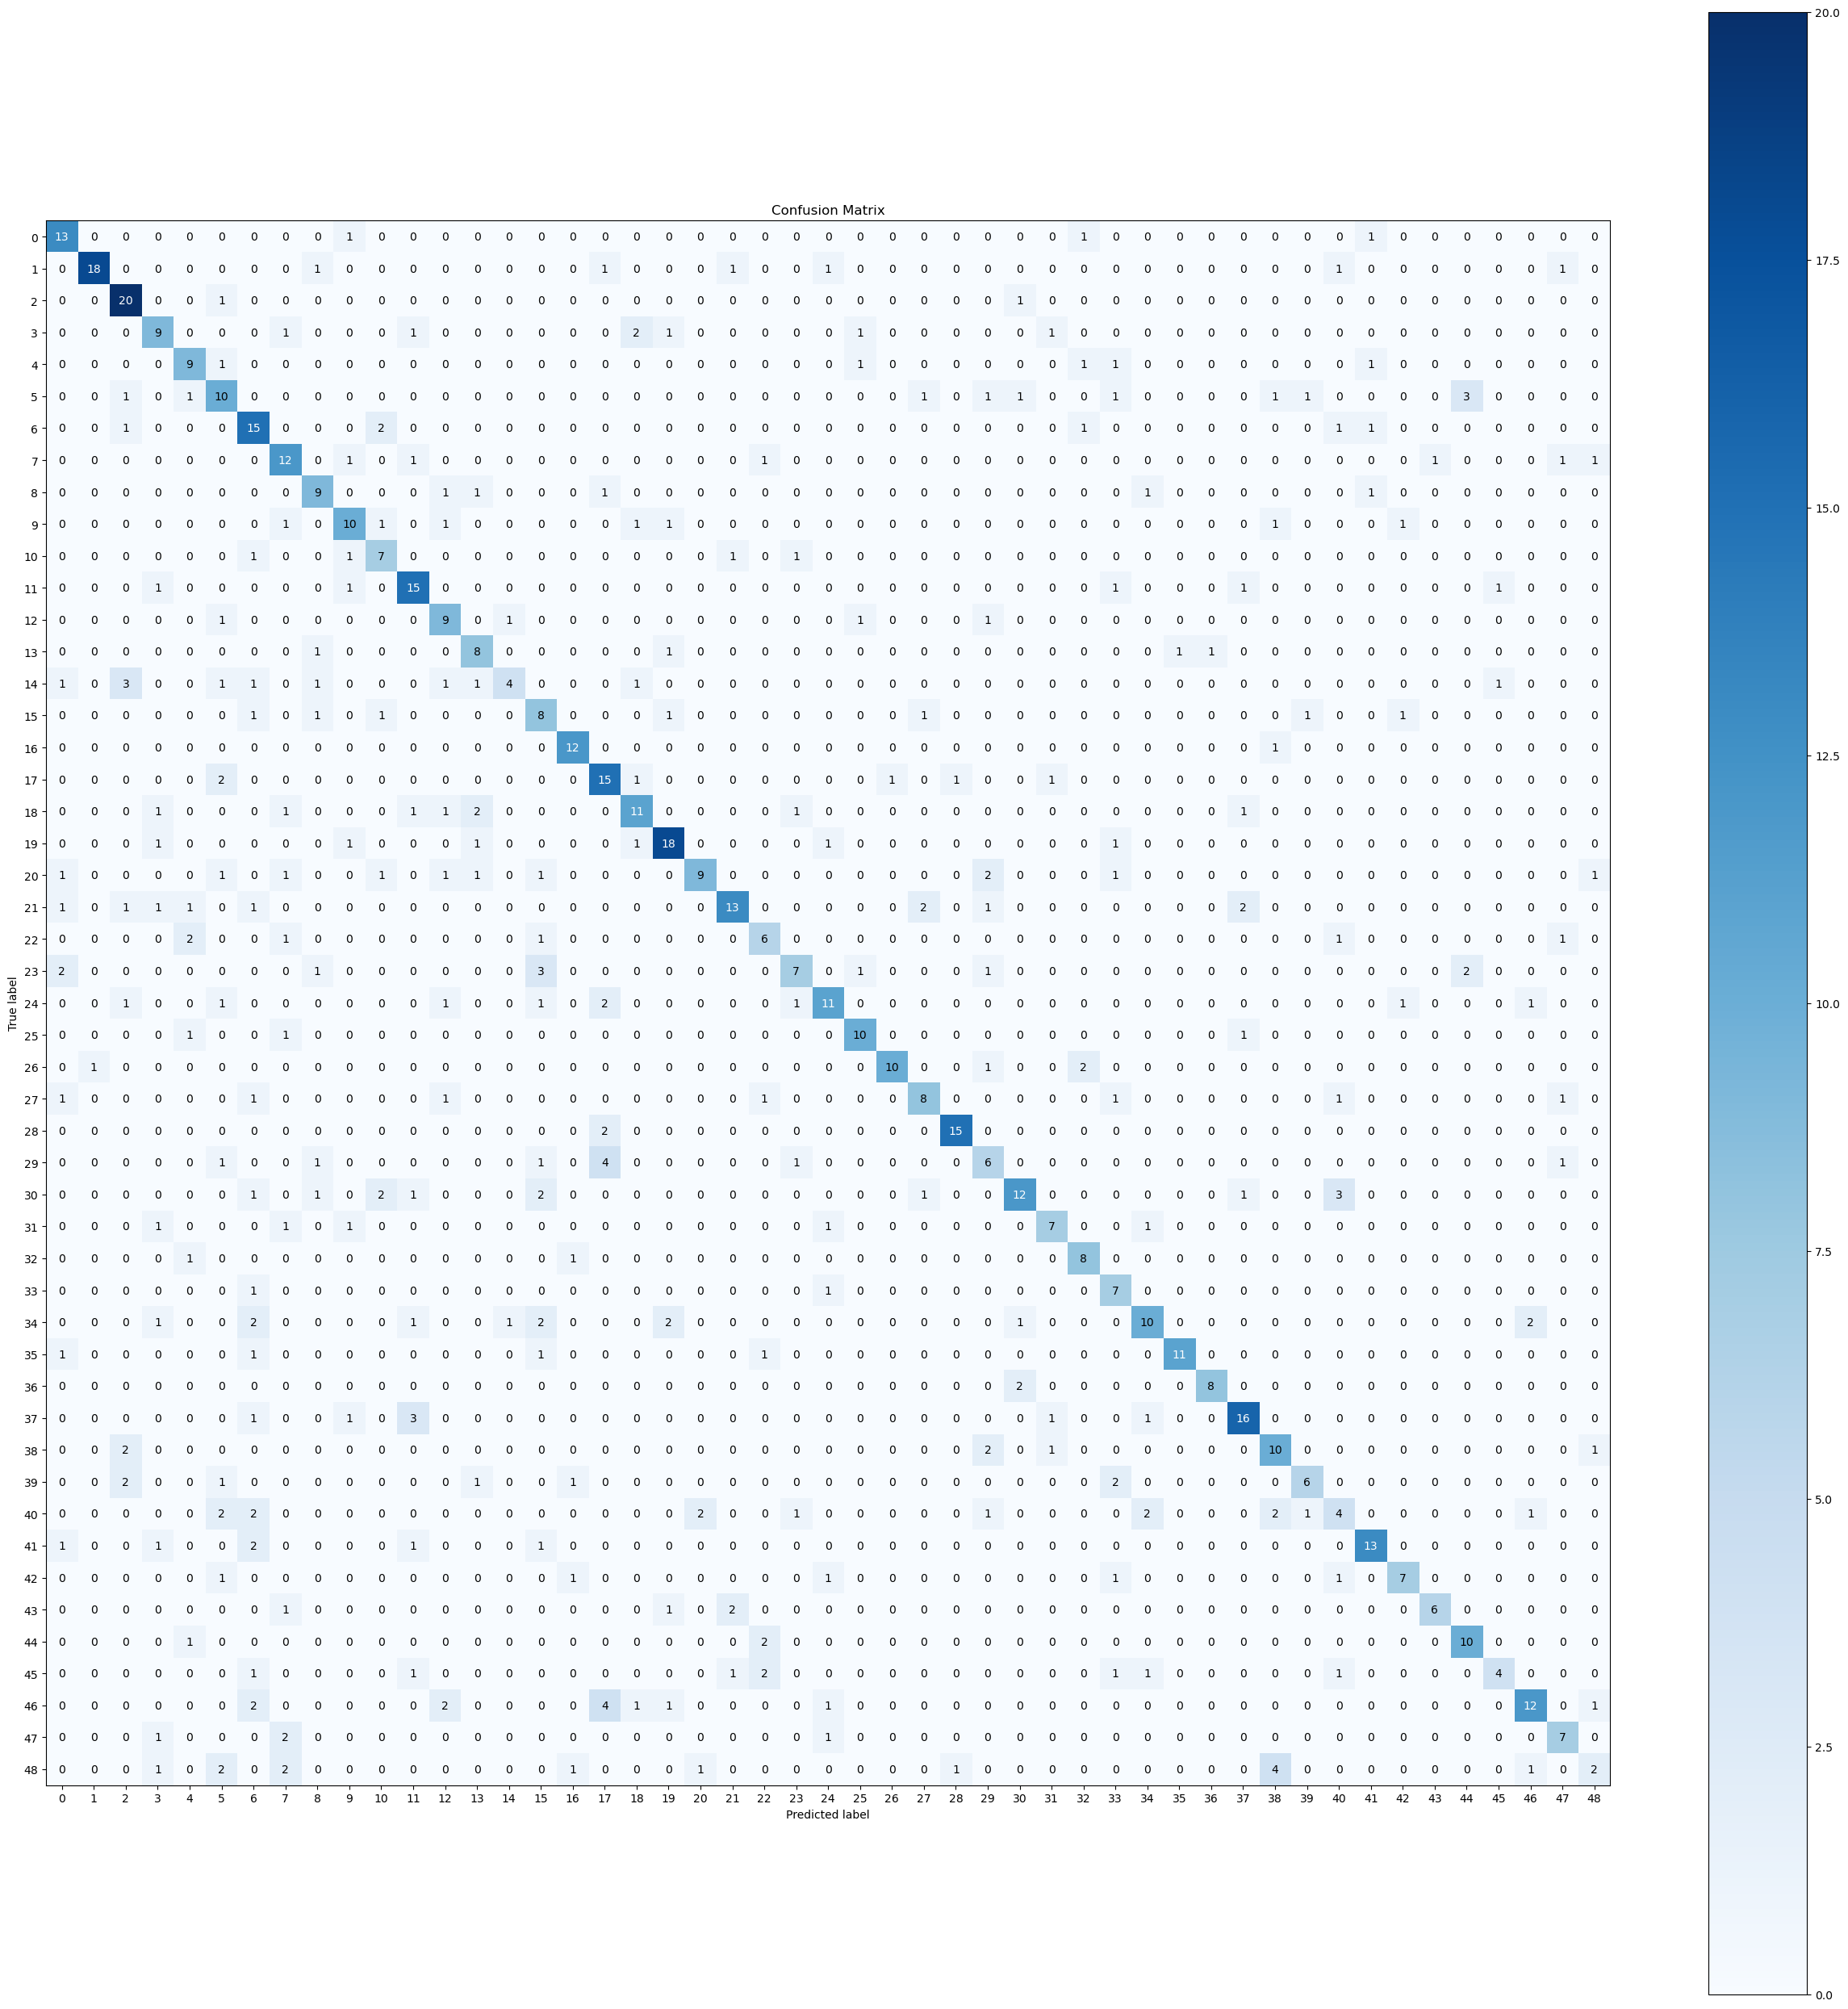

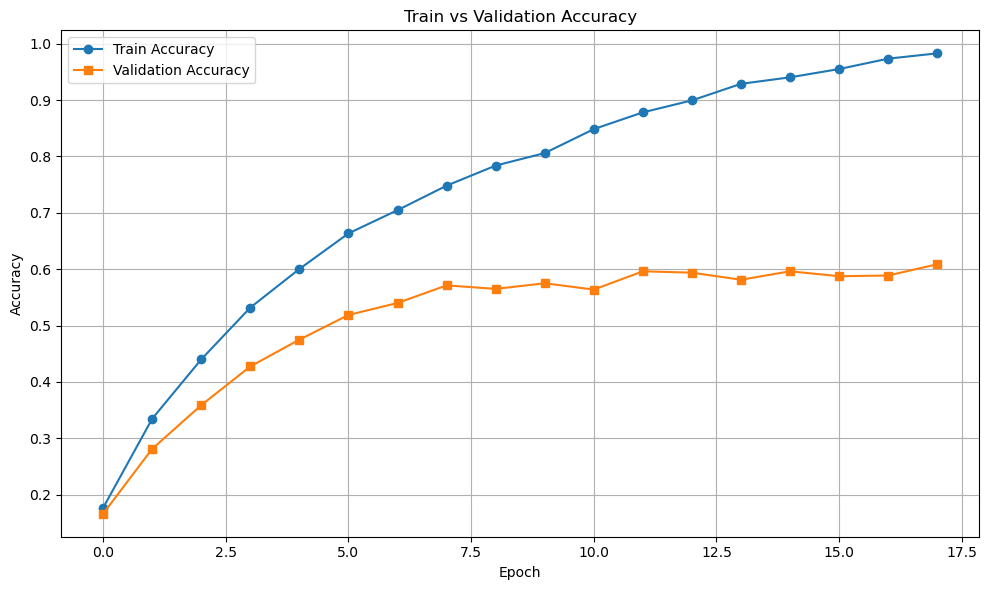

In [ ]:
# creo m1 con los mejores hiperparametros
m1 = NeuralNetwork(input_dim=784, hidden_layers=[100, 80], output_dim=49, learning_rate=0.01, rs="", batch_size=1250, adam=1, lambda_reg= 0.01, patience=10)
train_acc, val_acc = m1.fit(X_train,y_train, X_val, y_val, epochs=500)
m1.evaluate(X_val, y_val)
plot_loss_and_accuracy(train_acc, val_acc)

Early stopping at epoch 54
(1.5729551315307617, 0.59625)


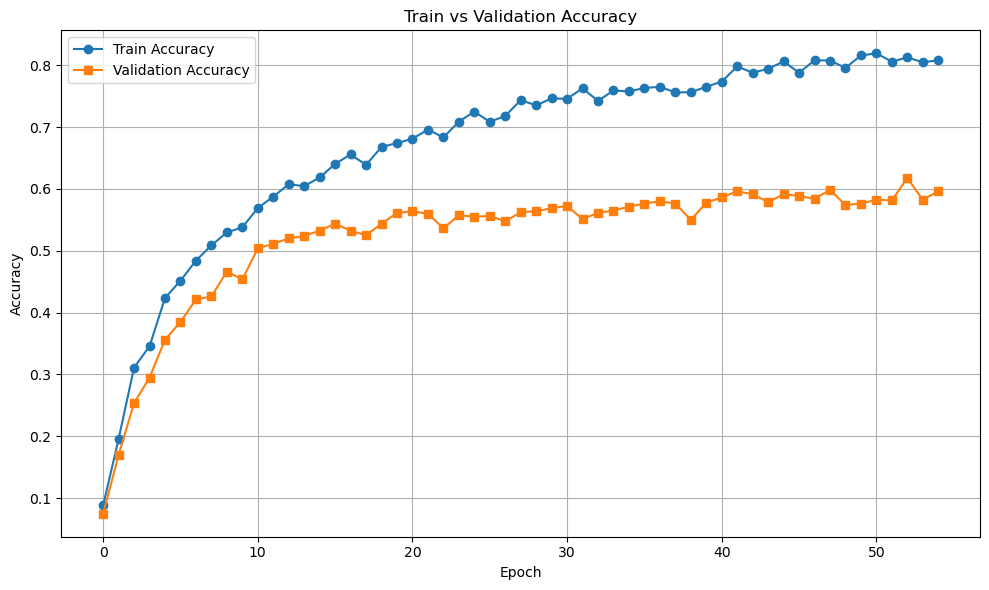

In [ ]:
#4
# modelo m2 con torch y los mismos hiperparametros
m2 = TorchNN(input_dim=784, hidden_layers=[100, 80], output_dim=49)
m2, train_acc, val_acc= train(m2, X_train, y_train, X_val, y_val)
print(evaluate(m2, X_val, y_val))
plot_loss_and_accuracy(train_acc, val_acc)


In [ ]:
#4.2
best_acc=0
best_hl=[]
for hl in [[25,25,25], [75, 50, 75], [100, 75, 50, 75, 100], [100,80],[100,100,100,100,100],[10,10], [100,10],[100, 85, 70]]:
    
    m = TorchNN(input_dim=784, hidden_layers=hl, output_dim=49)
    m,_,_= train(m, X_train, y_train, X_val, y_val)
    acc = evaluate(m, X_val, y_val)[1]
    if acc>best_acc:
        best_hl = hl
        best_acc = acc
print(best_hl, best_acc)

Early stopping at epoch 80
Early stopping at epoch 79
Early stopping at epoch 22
Early stopping at epoch 105
Early stopping at epoch 57
Early stopping at epoch 291
Early stopping at epoch 106
Early stopping at epoch 115
[100, 80] 0.62125


Early stopping at epoch 69
(1.5597730875015259, 0.59375)


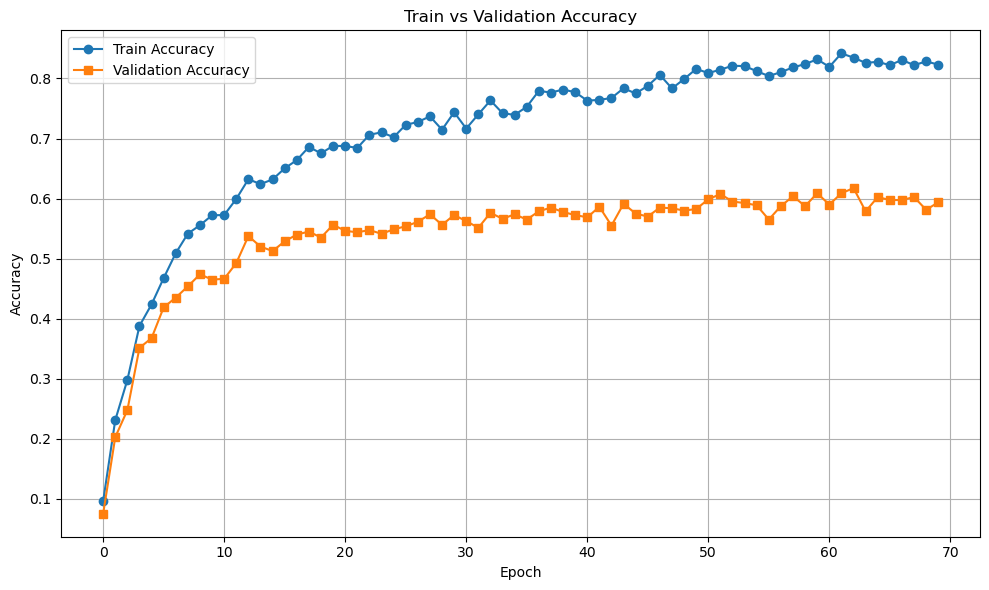

In [8]:
#modelo m3 con las mejores cnfiguraciones estudiadas
m3 = TorchNN(input_dim=784, hidden_layers=[100, 80], output_dim=49)
m3, train_acc, val_acc= train(m3, X_train, y_train, X_val, y_val)
print(evaluate(m3, X_val, y_val))
plot_loss_and_accuracy(train_acc, val_acc)

In [ ]:
#4.3
best_acc=0
best_hl=[]
for hl in [[5000], [100, 125, 100], [200, 100, 50, 100, 200], [100,100,100,100,100,100]]:
    
    m = TorchNN(input_dim=784, hidden_layers=hl, output_dim=49)
    m,_,_= train(m, X_train, y_train, X_val, y_val, l2=0, p=100)
    acc = evaluate(m, X_train, y_train)[1]
    if acc>best_acc:
        best_hl = hl
        best_acc = acc
print(best_hl, best_acc)

Early stopping at epoch 106
Early stopping at epoch 113
Early stopping at epoch 113
Early stopping at epoch 115
[5000] 1.0


(2.258413791656494, 0.72375)
(1.1377580676708021e-05, 1.0)


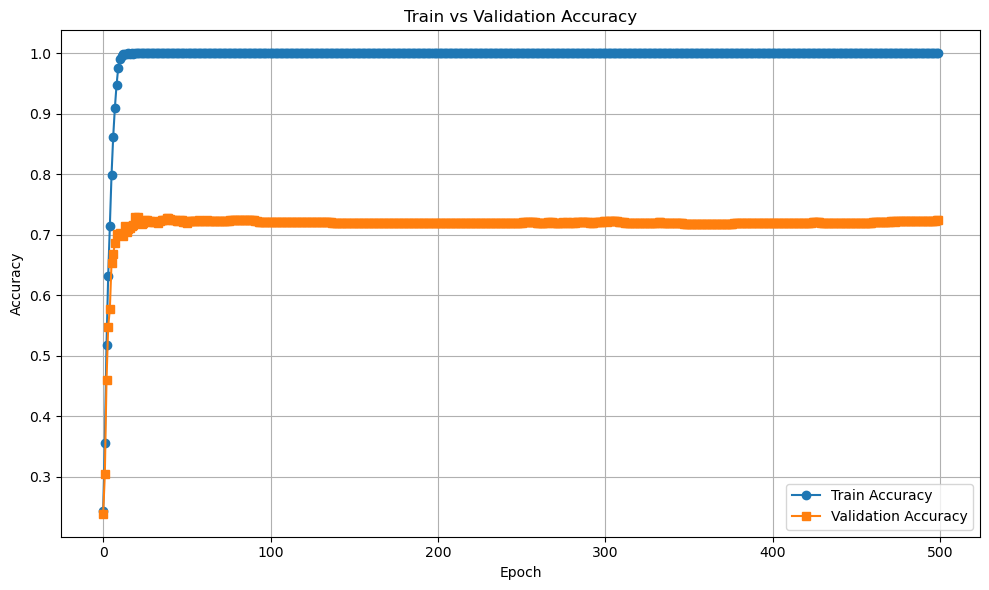

In [ ]:
# modelo m4 con la configuracion que mas overfitea
m4 = TorchNN(input_dim=784, hidden_layers=[5000], output_dim=49)
m4, train_acc, val_acc= train(m4, X_train, y_train, X_val, y_val, l2=0, p=0, adam=0)
print(evaluate(m4, X_val, y_val))
print(evaluate(m4, X_train, y_train))
plot_loss_and_accuracy(train_acc, val_acc)

In [13]:
# 4.4
print("m0")
m0.evaluate(X_test, y_test, cm_show=0)

print("m1")
m1.evaluate(X_test, y_test, cm_show=0)

print("m2")
print(evaluate(m2, X_test, y_test)[1])

print("m3")
print(evaluate(m3, X_test, y_test)[1])

print("m4")
print(evaluate(m4, X_test, y_test)[1])

m0
Accuracy: 0.5350
Cross-Entropy Loss: 1.8689
m1
Accuracy: 0.6040
Cross-Entropy Loss: 2.2093
m2
0.582
m3
0.585
m4
0.697


In [ ]:
#5
#uso m3 ya que es el que mejores resultados da y no overfitea tanto ya que aunque otros modelos tengan mas acc en val y train, m3 es el que mejor generaliza por lo que si lo quiero usar con datos nuevos es el mejor
m3.eval()


X_comp = np.load("X_COMP.npy")
X_tensor = torch.tensor(X_comp, dtype=torch.float32)

# proba con softmax
with torch.no_grad():
    outputs = m3(X_tensor)
    probs = F.softmax(outputs, dim=1).cpu().numpy()




df = pd.DataFrame(probs)
df.to_csv("Borrell_Manuel_predicciones.csv", index=False, header=False)